In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [33]:
df = pd.read_csv('./ml_source_files/advertising.csv')

In [34]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [35]:
y = df['Clicked on Ad']
x = df[['Daily Time Spent on Site','Age','Daily Internet Usage','Area Income','Male']]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=111)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=99)

In [38]:
preds = knn.predict(x_test)
preds

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        98
           1       0.74      0.56      0.64       102

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



In [40]:
accuracy_list = []

for k in range(1,100):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    pred = knn.score(x_test, y_test)
    accuracy_list.append(pred)

accuracy_list

[0.805,
 0.71,
 0.715,
 0.705,
 0.69,
 0.69,
 0.67,
 0.69,
 0.675,
 0.675,
 0.675,
 0.69,
 0.67,
 0.665,
 0.665,
 0.67,
 0.665,
 0.665,
 0.675,
 0.675,
 0.68,
 0.665,
 0.665,
 0.67,
 0.67,
 0.66,
 0.665,
 0.67,
 0.685,
 0.685,
 0.68,
 0.675,
 0.68,
 0.675,
 0.69,
 0.675,
 0.68,
 0.675,
 0.68,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.67,
 0.675,
 0.67,
 0.665,
 0.67,
 0.67,
 0.675,
 0.675,
 0.675,
 0.67,
 0.675,
 0.67,
 0.67,
 0.67,
 0.67,
 0.665,
 0.67,
 0.67,
 0.67,
 0.67,
 0.67,
 0.675,
 0.67,
 0.67,
 0.67,
 0.67,
 0.67,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.675,
 0.68,
 0.68,
 0.685,
 0.685,
 0.685,
 0.685,
 0.685,
 0.685,
 0.685,
 0.685,
 0.695,
 0.685,
 0.69,
 0.67,
 0.685,
 0.67,
 0.675,
 0.675,
 0.675]

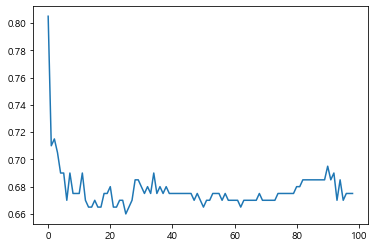

In [44]:
plt.plot(accuracy_list)

In [41]:
np.array(accuracy_list).argmax() + 1

1

In [42]:
knn = KNeighborsClassifier(1)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
preds

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        98
           1       0.84      0.76      0.80       102

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200

